# Credit card score

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


# Importing dataset
- for more details ragarding dataset go through text document 

In [2]:
credit_data=pd.read_csv("SouthGermanCredit.asc",sep=" ")
pd.set_option("display.max_columns",21)
credit_data.shape

(1000, 21)

In [3]:
credit_data.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


# EDA
- changing column names

In [4]:
new_columns=dict(zip(credit_data.columns,["status","duration","credit_histroy","purpose","amount","savings","employment_duration","installment_rate","personal_status_sex","other_debtors","present_residence","property","age","other_installment_plans","housing","number_credits","job","people_liable","telephone","foreign_worker","credit_risk"]))

In [5]:
new_columns

{'laufkont': 'status',
 'laufzeit': 'duration',
 'moral': 'credit_histroy',
 'verw': 'purpose',
 'hoehe': 'amount',
 'sparkont': 'savings',
 'beszeit': 'employment_duration',
 'rate': 'installment_rate',
 'famges': 'personal_status_sex',
 'buerge': 'other_debtors',
 'wohnzeit': 'present_residence',
 'verm': 'property',
 'alter': 'age',
 'weitkred': 'other_installment_plans',
 'wohn': 'housing',
 'bishkred': 'number_credits',
 'beruf': 'job',
 'pers': 'people_liable',
 'telef': 'telephone',
 'gastarb': 'foreign_worker',
 'kredit': 'credit_risk'}

In [6]:
credit_data.rename(columns=new_columns,inplace=True)

In [8]:
# credit_data.to_csv("south_german_dataset",index=False)

In [9]:
credit_data.isnull().sum()

status                     0
duration                   0
credit_histroy             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [10]:
new_valued_columns=["status","savings","employment_duration","installment_rate","personal_status_sex","other_debtors","present_residence","property","other_installment_plans","housing","number_credits","job","people_liable","telephone","foreign_worker"]

In [11]:
credit_data[new_valued_columns]=credit_data[new_valued_columns].apply(lambda x:x-1)

In [48]:
credit_data.head()

,status,duration,credit_histroy,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,4,2,1049,0,1,3,1,0,3,1,21,2,0,0,2,1,0,1,1
1,0,9,4,0,2799,0,2,1,2,0,1,0,36,2,0,1,2,0,0,1,1
2,1,12,2,9,841,1,3,1,1,0,3,0,23,2,0,0,1,1,0,1,1
3,0,12,4,0,2122,0,2,2,2,0,1,0,39,2,0,1,1,0,0,0,1
4,0,12,4,0,2171,0,2,3,2,0,3,1,38,0,1,1,1,1,0,0,1


<AxesSubplot:xlabel='age', ylabel='count'>

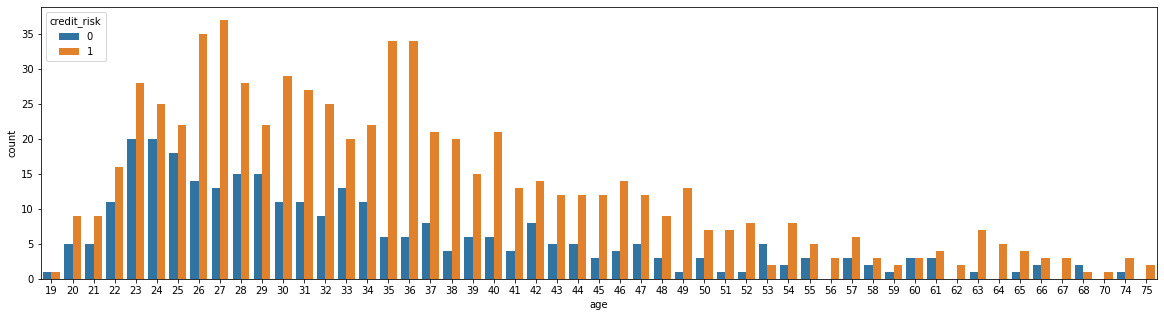

In [49]:
plt.figure(figsize=(20,5))
sn.countplot(credit_data.age,hue=credit_data.credit_risk,)

# Feature selection
- FS is done using extratrees classifier

In [14]:
X=credit_data.iloc[:,:-1]
y=credit_data.iloc[:,-1]

In [15]:
X.head()

,status,duration,credit_histroy,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,0,18,4,2,1049,0,1,3,1,0,3,1,21,2,0,0,2,1,0,1
1,0,9,4,0,2799,0,2,1,2,0,1,0,36,2,0,1,2,0,0,1
2,1,12,2,9,841,1,3,1,1,0,3,0,23,2,0,0,1,1,0,1
3,0,12,4,0,2122,0,2,2,2,0,1,0,39,2,0,1,1,0,0,0
4,0,12,4,0,2171,0,2,3,2,0,3,1,38,0,1,1,1,1,0,0


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2,100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,100)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 138, 177, 216, 255, 293, 332, 371, 410, 448, 487, 526, 565, 604, 642, 681, 720, 759, 797, 836, 875, 914, 953, 991, 1030, 1069, 1108, 1146, 1185, 1224, 1263, 1302, 1340, 1379, 1418, 1457, 1495, 1534, 1573, 1612, 1651, 1689, 1728, 1767, 1806, 1844, 1883, 1922, 1961, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 30, 50, 70, 90, 111, 131, 151, 171, 191, 212, 232, 252, 272, 292, 313, 333, 353, 373, 393, 414, 434, 454, 474, 494, 515, 535, 555, 575, 595, 616, 636, 656, 676, 696, 717, 737, 757, 777, 797, 818, 838, 858, 878, 898, 919, 939, 959, 979, 1000], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()

In [23]:
random_cv=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=5,verbose=1,random_state=90,n_jobs=-1)
random_cv.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 30, 50, 70, 90, 111,
                                                      131, 151, 171, 191, 212,
                                                      232, 252, 272, 292, 313,
                                                      333, 353, 373, 393, 414,
                                                      434, 454, 474, 494, 515,
                                                      535, 555, 575, 595, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19, 21,
                                                  

In [24]:
random_cv.best_params_

{'n_estimators': 1457,
 'min_samples_split': 38,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 292,
 'criterion': 'entropy'}

In [25]:
new_model=random_cv.best_estimator_

In [26]:
new_model.fit(X,y)

ExtraTreesClassifier(criterion='entropy', max_depth=292, min_samples_leaf=3,
                     min_samples_split=38, n_estimators=1457)

In [27]:
print(new_model.feature_importances_)

[0.32017025 0.07658442 0.09942261 0.0275888  0.04398337 0.07600725
 0.03850663 0.02712599 0.02153287 0.03288222 0.01806492 0.04228454
 0.0258356  0.03284838 0.02558345 0.0165506  0.01928285 0.01809758
 0.01741555 0.02023212]


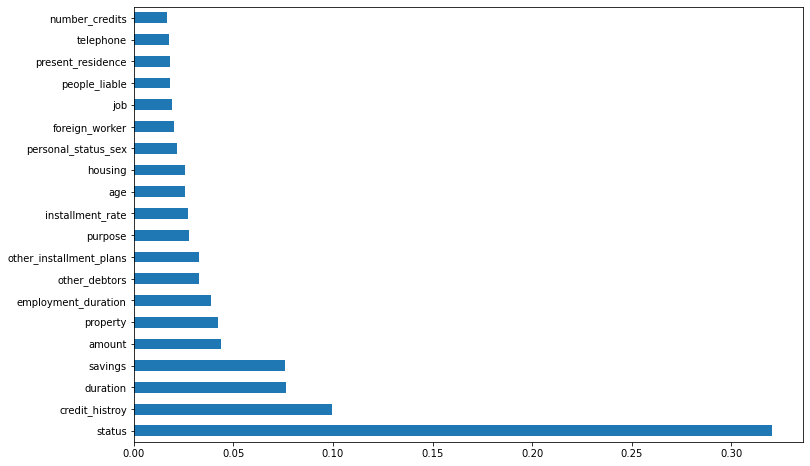

In [30]:
plt.figure(figsize = (12,8))
best_features=pd.Series(new_model.feature_importances_,index=X.columns)
best_features.nlargest(20).plot(kind='barh')
plt.show()

In [31]:
X=credit_data.loc[:,['status', 'credit_histroy', 'duration', 'savings', 'property', 'amount','employment_duration', 'purpose', 'age', 'installment_rate']]
y=credit_data.iloc[:,-1]

# Model selection
- random forest calssifier and ada-boost classifier algorithms are used 
- both models are passed through hyperparameter tuning and best model is selected

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction=RF.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,RF_prediction))
print(accuracy_score(y_test,RF_prediction))
print(classification_report(y_test,RF_prediction))

[[ 34  32]
 [ 22 162]]
0.784
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        66
           1       0.84      0.88      0.86       184

    accuracy                           0.78       250
   macro avg       0.72      0.70      0.71       250
weighted avg       0.77      0.78      0.78       250



In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2,100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,100)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 138, 177, 216, 255, 293, 332, 371, 410, 448, 487, 526, 565, 604, 642, 681, 720, 759, 797, 836, 875, 914, 953, 991, 1030, 1069, 1108, 1146, 1185, 1224, 1263, 1302, 1340, 1379, 1418, 1457, 1495, 1534, 1573, 1612, 1651, 1689, 1728, 1767, 1806, 1844, 1883, 1922, 1961, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 30, 50, 70, 90, 111, 131, 151, 171, 191, 212, 232, 252, 272, 292, 313, 333, 353, 373, 393, 414, 434, 454, 474, 494, 515, 535, 555, 575, 595, 616, 636, 656, 676, 696, 717, 737, 757, 777, 797, 818, 838, 858, 878, 898, 919, 939, 959, 979, 1000], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83

In [38]:
RF_cv=RandomForestClassifier()
randomcv=RandomizedSearchCV(estimator=RF_cv,param_distributions=random_grid,n_iter=100,cv=5,verbose=1,random_state=40,n_jobs=-1)
randomcv.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 30, 50, 70, 90, 111,
                                                      131, 151, 171, 191, 212,
                                                      232, 252, 272, 292, 313,
                                                      333, 353, 373, 393, 414,
                                                      434, 454, 474, 494, 515,
                                                      535, 555, 575, 595, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19, 21,
                                                

In [39]:
randomcv.best_params_

{'n_estimators': 1263,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 373,
 'criterion': 'gini'}

In [40]:
new_RF_model=randomcv.best_estimator_

In [41]:
new_RF_model

RandomForestClassifier(max_depth=373, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=1263)

In [42]:
new_RF_model.fit(X_train,y_train)
new_RF_prediction=new_RF_model.predict(X_test)

In [54]:
print("before hyperparameter tuning\n")
print(confusion_matrix(y_test,RF_prediction))
print(accuracy_score(y_test,RF_prediction))
print(classification_report(y_test,RF_prediction))
print("--------------------------------")
print("\nafter hyperparameter tuning")
print(confusion_matrix(y_test,new_RF_prediction))
print(accuracy_score(y_test,new_RF_prediction))
print(classification_report(y_test,new_RF_prediction))

before hyperparameter tuning

[[ 34  32]
 [ 22 162]]
0.784
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        66
           1       0.84      0.88      0.86       184

    accuracy                           0.78       250
   macro avg       0.72      0.70      0.71       250
weighted avg       0.77      0.78      0.78       250

--------------------------------

after hyperparameter tuning
[[ 35  31]
 [ 19 165]]
0.8
              precision    recall  f1-score   support

           0       0.65      0.53      0.58        66
           1       0.84      0.90      0.87       184

    accuracy                           0.80       250
   macro avg       0.74      0.71      0.73       250
weighted avg       0.79      0.80      0.79       250



In [45]:
from sklearn.ensemble import AdaBoostClassifier
ADB_clf = AdaBoostClassifier(n_estimators=100,algorithm="SAMME.R",learning_rate=0.1)
ADB_clf.fit(X_train,y_train)
ADB_clf_prediction=ADB_clf.predict(X_test)

In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000)]
# shrinks the contribution of each classifier by learning_rate, it is suggested to set α to smaller values (α<.1).
# learning_rate = [x for x in np.linspace(0.1, 1,9)]
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

algorithm=["SAMME.R"]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'algorithm': algorithm}
print(random_grid)

{'n_estimators': [100, 138, 177, 216, 255, 293, 332, 371, 410, 448, 487, 526, 565, 604, 642, 681, 720, 759, 797, 836, 875, 914, 953, 991, 1030, 1069, 1108, 1146, 1185, 1224, 1263, 1302, 1340, 1379, 1418, 1457, 1495, 1534, 1573, 1612, 1651, 1689, 1728, 1767, 1806, 1844, 1883, 1922, 1961, 2000], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'algorithm': ['SAMME.R']}


In [57]:
ADB_cv=AdaBoostClassifier()
ADB_randomcv=RandomizedSearchCV(estimator=ADB_cv,param_distributions=random_grid,n_iter=100,cv=5,verbose=1,random_state=40,n_jobs=-1)
ADB_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'n_estimators': [100, 138, 177, 216,
                                                         255, 293, 332, 371,
                                                         410, 448, 487, 526,
                                                         565, 604, 642, 681,
                                                         720, 759, 797, 836,
                                                         875, 914, 953, 991,
                                                         1030, 1069, 1108, 1146,
                                                         1185, 1224, ...]},
            

In [58]:
ADB_randomcv.best_params_

{'n_estimators': 177, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}

In [62]:
new_ADB_model=ADB_randomcv.best_estimator_
new_ADB_model.fit(X_train,y_train)
new_ADB_prediction=new_ADB_model.predict(X_test)

In [64]:
print("before hyperparameter tuning\n")
print(confusion_matrix(y_test,ADB_clf_prediction))
print(accuracy_score(y_test,ADB_clf_prediction))
print(classification_report(y_test,ADB_clf_prediction))
print("--------------------------------")
print("\nafter hyperparameter tuning")
print(confusion_matrix(y_test,new_ADB_prediction))
print(accuracy_score(y_test,new_ADB_prediction))
print(classification_report(y_test,new_ADB_prediction))

before hyperparameter tuning

[[ 28  38]
 [ 18 166]]
0.776
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        66
           1       0.81      0.90      0.86       184

    accuracy                           0.78       250
   macro avg       0.71      0.66      0.68       250
weighted avg       0.76      0.78      0.76       250

--------------------------------

after hyperparameter tuning
[[ 36  30]
 [ 31 153]]
0.756
              precision    recall  f1-score   support

           0       0.54      0.55      0.54        66
           1       0.84      0.83      0.83       184

    accuracy                           0.76       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.76      0.76      0.76       250



# saving model for futher use

In [65]:
import pickle
with open("random_forest_model.pickle","wb") as f:
    pickle.dump(new_RF_model,f)